In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

# **image Preprocess**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images_path = '/content/drive/MyDrive/ML/flickr8k-sau/Flickr_Data/Images'
images = glob(images_path+'/*.jpg')
len(images)


3601

In [ ]:
images[:5]

['/content/drive/MyDrive/ML/flickr8k-sau/Flickr_Data/Images/2658009523_b49d611db8.jpg',
 '/content/drive/MyDrive/ML/flickr8k-sau/Flickr_Data/Images/2673148534_8daf0de833.jpg',
 '/content/drive/MyDrive/ML/flickr8k-sau/Flickr_Data/Images/2677614492_792023b928.jpg',
 '/content/drive/MyDrive/ML/flickr8k-sau/Flickr_Data/Images/2665461736_595c87f0a3.jpg',
 '/content/drive/MyDrive/ML/flickr8k-sau/Flickr_Data/Images/264141937_585320617a.jpg']

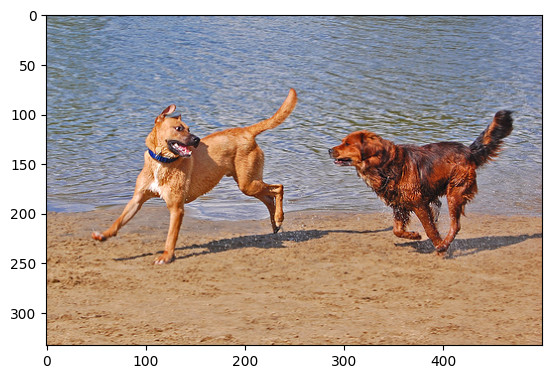

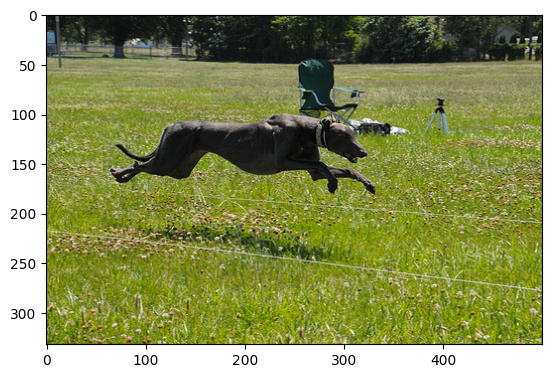

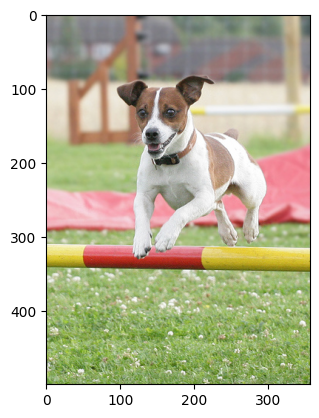

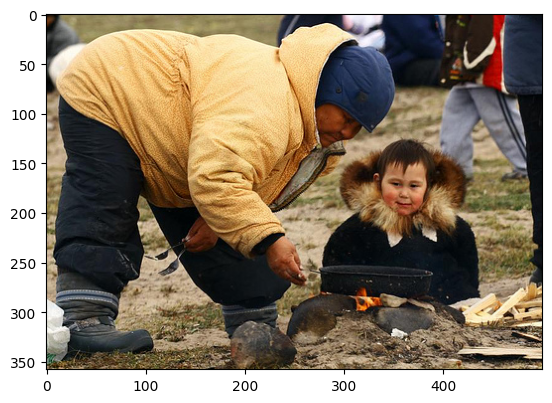

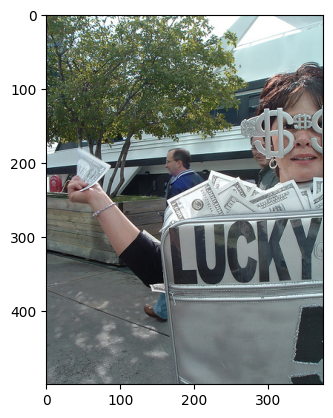

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [ ]:
# input size - (None,456,456,3)
# output size - prediction into 1000 categories
from keras.applications import EfficientNetB5

incept_model = EfficientNetB5(include_top=True)
incept_model.summary()

123465288/123465288 [==============================] - 1s 0us/step
Model: "efficientnetb5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 456, 456, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 456, 456, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Resc

In [ ]:
# input size - (None,4096,4096,3)
# output size -  (None, 2048)
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 456, 456, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 456, 456, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 456, 456, 3)  0           ['normalization[0][0]']      

In [ ]:
# image_features ,key - image path(unique name) ,value - vector of sixe (2048)
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (456,456))
    
    img = img.reshape(1,456,456,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)
    
        
    

1/1 [==============================] - 0s 53ms/step
50
1/1 [==============================] - 0s 33ms/step
100
1/1 [==============================] - 0s 33ms/step
150
1/1 [==============================] - 0s 54ms/step
200
1/1 [==============================] - 0s 35ms/step
250
1/1 [==============================] - 0s 35ms/step
300
1/1 [==============================] - 0s 41ms/step
350
1/1 [==============================] - 0s 53ms/step
400
1/1 [==============================] - 0s 34ms/step
450
1/1 [==============================] - 0s 35ms/step
500
1/1 [==============================] - 0s 35ms/step
550
1/1 [==============================] - 0s 36ms/step
600
1/1 [==============================] - 0s 33ms/step
650
1/1 [==============================] - 0s 34ms/step
700
1/1 [==============================] - 0s 33ms/step
750
1/1 [==============================] - 0s 35ms/step
800
1/1 [==============================] - 0s 35ms/step
850
1/1 [==============================] - 0s 33ms/st

In [ ]:
len(images_features)

1500

# **Text Preprocess**

In [ ]:
caption_path = '/content/drive/MyDrive/ML/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'

In [ ]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
len(captions)

40461

In [ ]:
captions

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a pai

In [ ]:
# key - image-name(unique),value-list(captions of image)
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [ ]:
len(captions_dict)

1467

In [ ]:
captions_dict

{'2340206885_58754a799a.jpg': ['A group of dogs look at each other while standing in the snow .',
  'three dogs come face to face with each other in a snowy field .',
  'Three dogs in the snow .',
  'Three dogs meet in the snow .',
  'Three dogs playing in the snow .'],
 '2340919359_f56787d307.jpg': ['A man is sitting on a black and brown dog .',
  'A man stands over a brown and black dog in the grass .',
  "a man wearing a black and white shirt jumping on a dog 's back",
  'An attack dog is working with his trainer .',
  'A running dog and a standing man on a dry field of grass .'],
 '2341254813_c53a5ef27a.jpg': ['a boy in a green shirt is jumping with his arms in the air at the end of a bowling alley .',
  'A boy wearing a green shirt is jumping in front of a lane at a bowling alley .',
  'A child jumps in the air at a bowling alley .',
  'A young boy with a Mohawk and green shirt is excited about bowling .',
  'A young boy with a Mohawk jumping at a bowling alley'],
 '234241682_51d9

# **Visualize Images with captions**

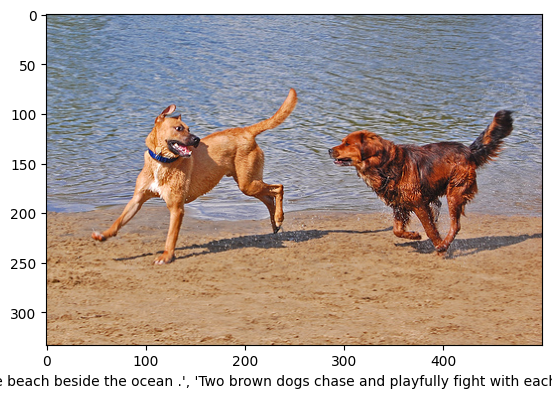

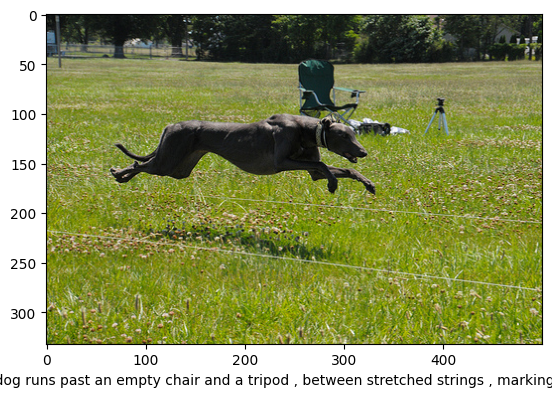

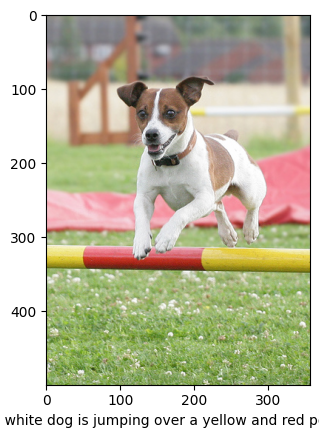

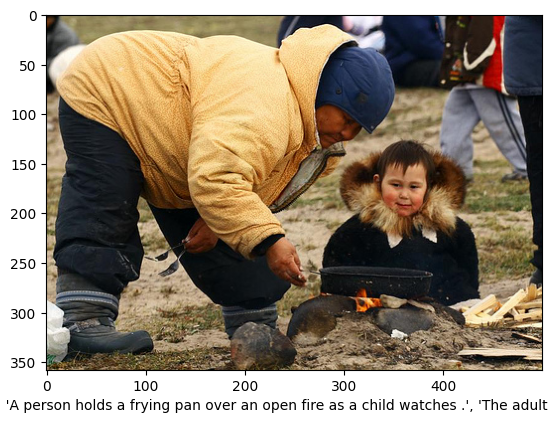

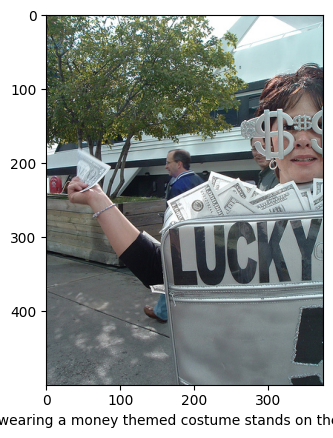

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

In [ ]:

def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified
    

In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
captions_dict

{'2340206885_58754a799a.jpg': ['startofseq a group of dogs look at each other while standing in the snow . endofseq',
  'startofseq three dogs come face to face with each other in a snowy field . endofseq',
  'startofseq three dogs in the snow . endofseq',
  'startofseq three dogs meet in the snow . endofseq',
  'startofseq three dogs playing in the snow . endofseq'],
 '2340919359_f56787d307.jpg': ['startofseq a man is sitting on a black and brown dog . endofseq',
  'startofseq a man stands over a brown and black dog in the grass . endofseq',
  "startofseq a man wearing a black and white shirt jumping on a dog 's back endofseq",
  'startofseq an attack dog is working with his trainer . endofseq',
  'startofseq a running dog and a standing man on a dry field of grass . endofseq'],
 '2341254813_c53a5ef27a.jpg': ['startofseq a boy in a green shirt is jumping with his arms in the air at the end of a bowling alley . endofseq',
  'startofseq a boy wearing a green shirt is jumping in front of

# **Create Vocabulary**

In [ ]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split(' '):
          if word not in count_words:

                count_words[word] = 0
          else:
                count_words[word] += 1
            

            

In [ ]:
len(count_words)

3781

In [ ]:
THRESH = -1
count = 1
# it is the vocabulary for each word
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1
        

In [ ]:
len(new_dict)

3781

In [ ]:
new_dict['<OUT>'] = len(new_dict) 

In [ ]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [ ]:
captions_dict

{'2340206885_58754a799a.jpg': [[1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16],
  [1, 17, 5, 18, 19, 20, 19, 21, 8, 9, 12, 2, 22, 23, 15, 16],
  [1, 17, 5, 12, 13, 14, 15, 16],
  [1, 17, 5, 24, 12, 13, 14, 15, 16],
  [1, 17, 5, 25, 12, 13, 14, 15, 16]],
 '2340919359_f56787d307.jpg': [[1,
   2,
   26,
   27,
   28,
   29,
   2,
   30,
   31,
   32,
   33,
   15,
   16],
  [1, 2, 26, 34, 35, 2, 32, 31, 30, 33, 12, 13, 36, 15, 16],
  [1, 2, 26, 37, 2, 30, 31, 38, 39, 40, 29, 2, 33, 41, 42, 16],
  [1, 43, 44, 33, 27, 45, 21, 46, 47, 15, 16],
  [1, 2, 48, 33, 31, 2, 11, 26, 29, 2, 49, 23, 4, 36, 15, 16]],
 '2341254813_c53a5ef27a.jpg': [[1,
   2,
   50,
   12,
   2,
   51,
   39,
   27,
   40,
   21,
   46,
   52,
   12,
   13,
   53,
   7,
   13,
   54,
   4,
   2,
   55,
   56,
   15,
   16],
  [1, 2, 50, 37, 2, 51, 39, 27, 40, 12, 57, 4, 2, 58, 7, 2, 55, 56, 15, 16],
  [1, 2, 59, 60, 12, 13, 53, 7, 2, 55, 56, 15, 16],
  [1, 2, 61, 50, 2

------------------------------------------------------------------------------------------------------

# **Build Generator Function**

In [ ]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[1, 2, 50, 12, 2, 51, 39, 27, 40, 21, 46, 52, 12, 13, 53, 7, 13, 54, 4, 2, 55, 56, 15, 16]
[1, 43, 376, 26, 37, 2, 51, 377, 31, 76, 378, 27, 113, 125, 379, 372, 380, 12, 57, 4, 46, 19, 151, 10, 11, 29, 2, 327, 381, 12, 57, 4, 2, 3, 4, 382, 25, 383, 15, 16]


In [ ]:
MAX_LEN

40

In [ ]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out
    
    

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)

In [ ]:
len(X), len(y_in), len(y_out)

(94291, 94291, 94291)

In [ ]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')



In [ ]:
X.shape, y_in.shape, y_out.shape

((94291, 2048), (94291, 40), (94291, 3782))

In [ ]:
X[1510]

array([ 0.1801364 ,  0.05331241, -0.12625296, ...,  0.34852478,
        0.17937526, -0.02593228], dtype=float32)

In [ ]:
y_in[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

# **MODEL**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input,Add
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout

from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = keras.Sequential(
    [
        layers.Dense(embedding_size, input_shape=(2048,), activation='relu'),
        layers.RepeatVector(max_len),
    ]
)
image_model.summary()

language_model = keras.Sequential(
    [
        layers.Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len),
        layers.Bidirectional(LSTM(256, return_sequences=True)),
        layers.Dense(embedding_size),
    ]
)
language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = Bidirectional(LSTM(128, return_sequences=True))(conca)
x = Bidirectional(LSTM(512, return_sequences=False))(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 40, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 128)           484096    
                                                                 
 bidirectional (Bidirectiona  (None, 40, 512)          788480    
 l)                         

In [ ]:
# after running 50 epochs earlier
# so in total 100 epochs are run to achive accuracy of 91 percent
model.fit([X, y_in], y_out, batch_size = 512, epochs=50)

Epoch 1/50
185/185 [==============================] - 35s 188ms/step - loss: 0.3780 - accuracy: 0.8777
Epoch 2/50
185/185 [==============================] - 35s 187ms/step - loss: 0.3684 - accuracy: 0.8802
Epoch 3/50
185/185 [==============================] - 36s 192ms/step - loss: 0.3621 - accuracy: 0.8832
Epoch 4/50
185/185 [==============================] - 36s 197ms/step - loss: 0.3563 - accuracy: 0.8846
Epoch 5/50
185/185 [==============================] - 37s 198ms/step - loss: 0.3503 - accuracy: 0.8844
Epoch 6/50
185/185 [==============================] - 37s 200ms/step - loss: 0.3460 - accuracy: 0.8858
Epoch 7/50
185/185 [==============================] - 37s 201ms/step - loss: 0.3421 - accuracy: 0.8871
Epoch 8/50
185/185 [==============================] - 37s 202ms/step - loss: 0.3342 - accuracy: 0.8886
Epoch 9/50
185/185 [==============================] - 38s 204ms/step - loss: 0.3314 - accuracy: 0.8900
Epoch 10/50
185/185 [==============================] - 38s 203ms/step - l

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
model.save('model.h5')

In [ ]:
model.save_weights('mine_model_weights.h5')

In [ ]:
np.save('vocab.npy', new_dict)

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

# **Predictions**

1/1 [==============================] - 0s 26ms/step


IndexError: ignored

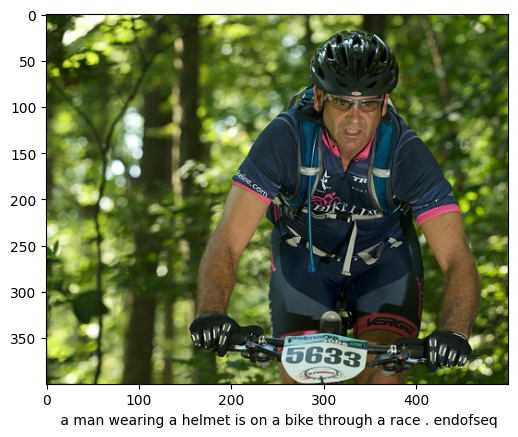

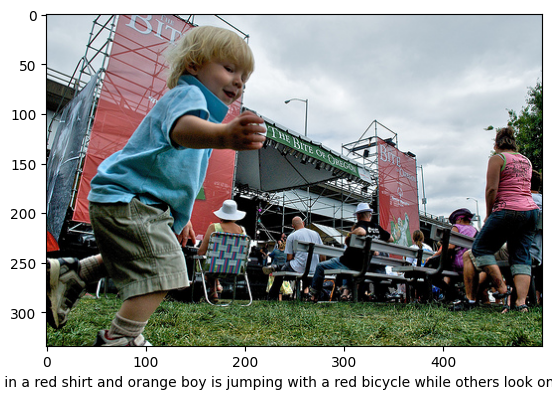

In [ ]:
for i in range(5):
    
    no = np.random.randint(100,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)